In [68]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import sklearn.linear_model as slm
from sklearn.metrics import accuracy_score

k = 41

In [69]:
colors = ListedColormap(['red', 'green'])
points, met = datasets.make_circles(n_samples=10000, shuffle=True, noise=0.15)

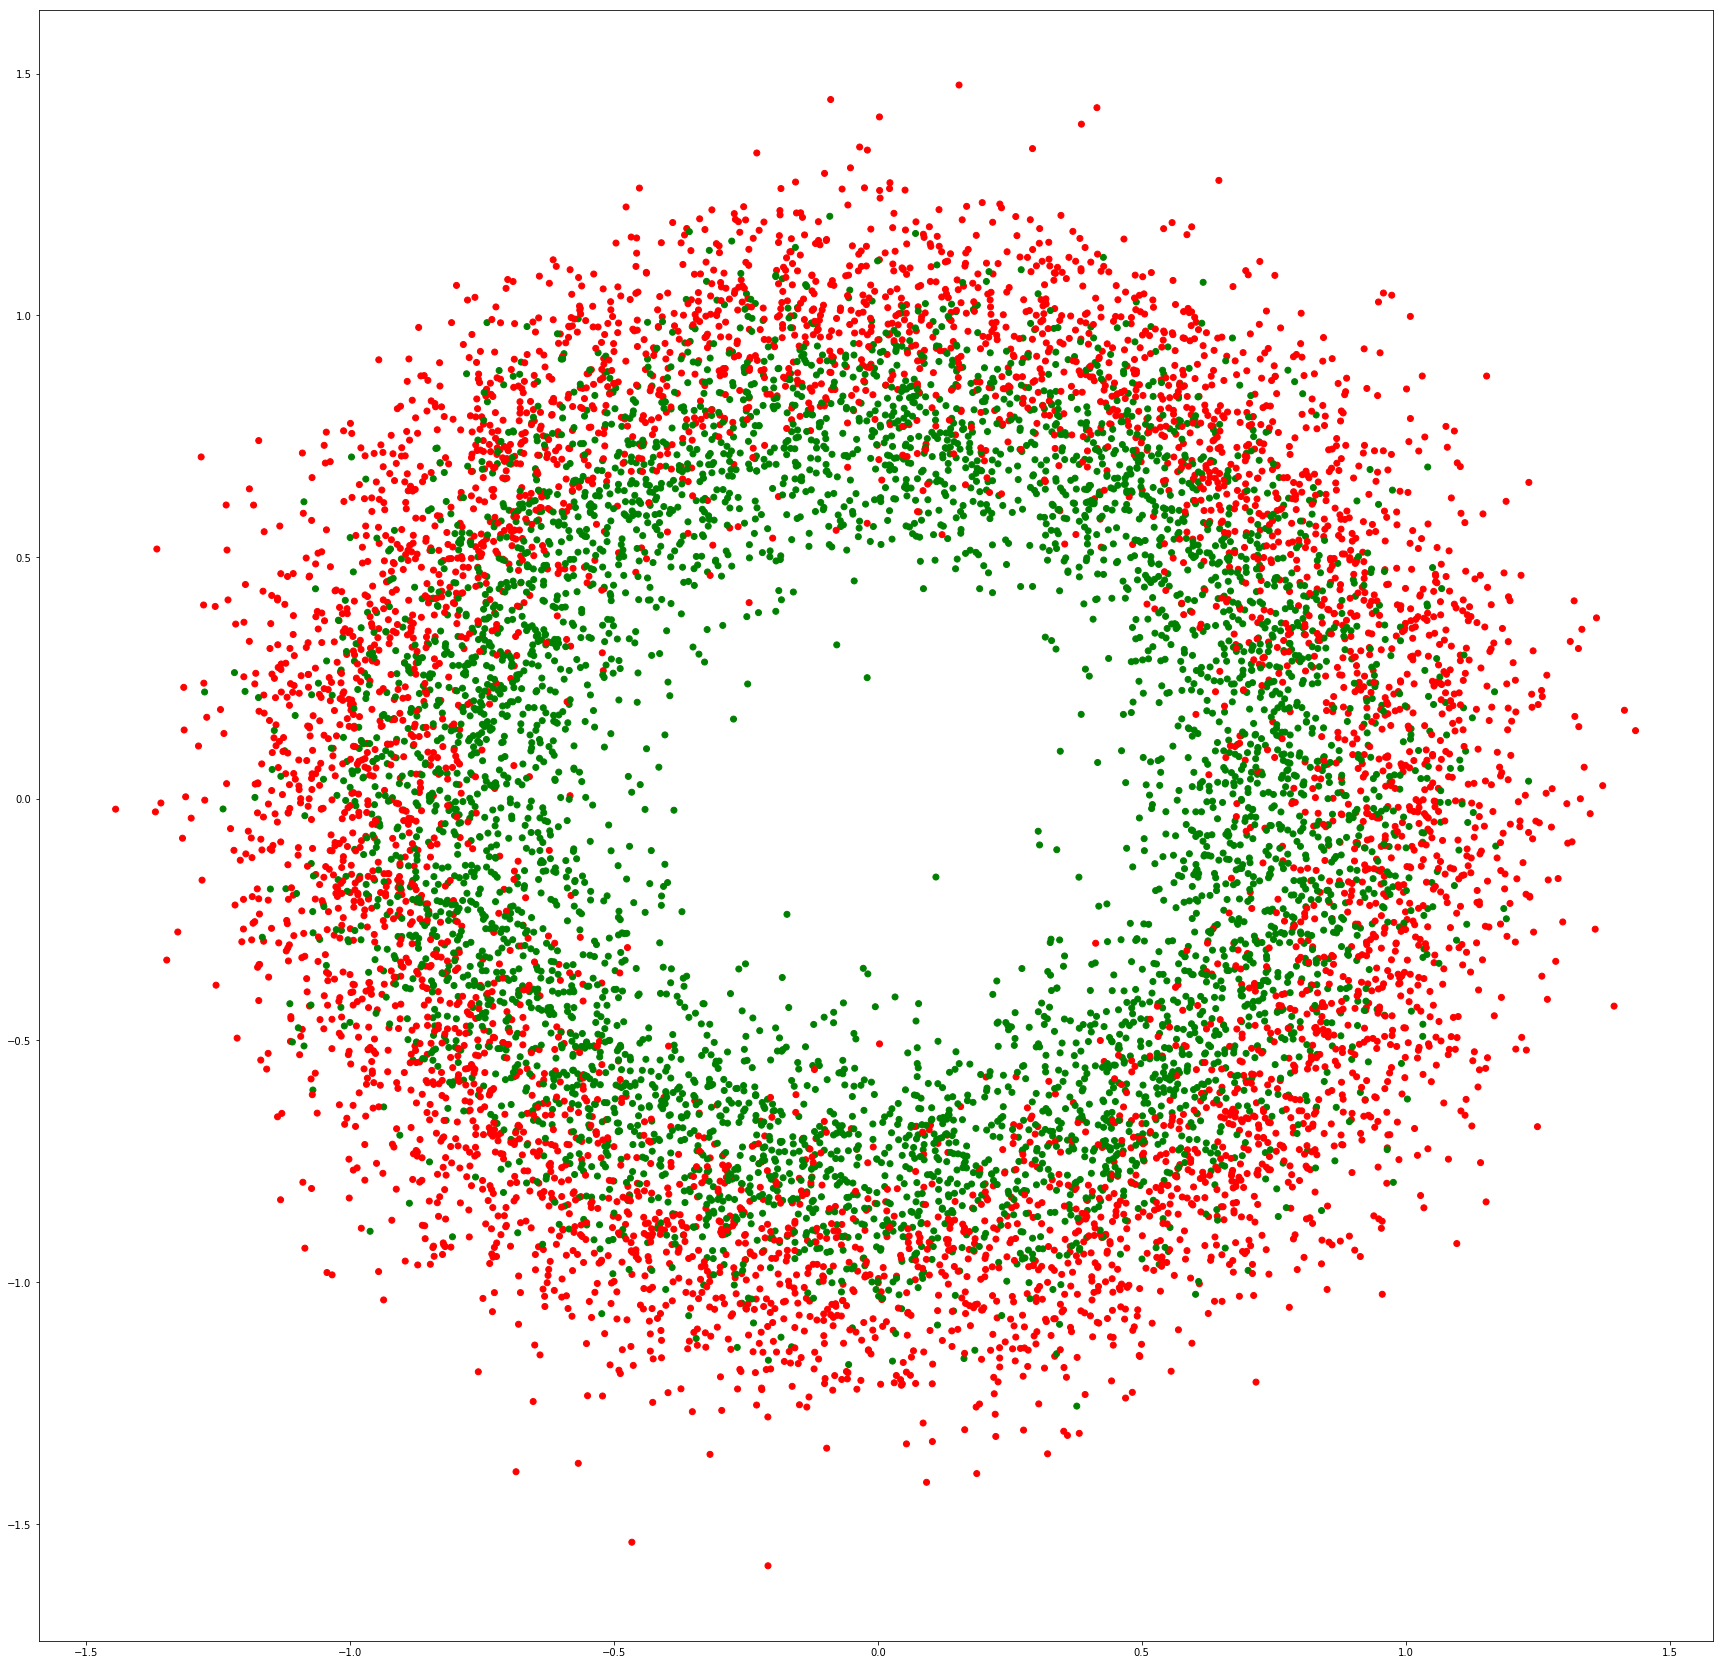

In [70]:
plt.figure(figsize=(30,30))
plt.scatter(points[:, 0], points[:, 1], c=met, cmap=colors)
plt.show()

In [71]:
x_train, x_test, y_train, y_test = train_test_split(points, met, test_size=0.3, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(x_train, y_train)

lin_clf = slm.SGDClassifier()
lin_clf.fit(x_train, y_train)

print 'Стандартные классификаторы обучены '

Стандартные классификаторы обучены 


In [72]:
x_train = np.column_stack((x_train, y_train))

In [73]:
class node:
    axis = 0
    points = np.array([])
    mean = 0

    def set_childs(self, left, right):
        self.left = left
        self.right = right
        
    def mean(self):
        if self.axis == 0:
            return sum(self.points[:, 0]) / len(self.points)
        else : 
            return sum(self.points[:, 1]) / len(self.points)
        
    def __init__ (self, symb):
        self.axis = symb 

In [74]:
class k_tree:
    
    def try_insert(self, vertex):
        if len(vertex.points) > k :
            if vertex.axis == 0:
                self.x_insert(vertex)
            else:
                self.y_insert(vertex)
        else:
            plt.scatter(vertex.points[:, 0], vertex.points[:, 1])
            
                
    def x_insert(self, vertex):
        x_mean = vertex.mean()
        vertex.mean = x_mean
        left = node(1)
        right = node(1)
        left.points = np.array([vertex.points[i] for i in xrange(0, vertex.points.shape[0]) if vertex.points[i][0] <= x_mean])
        right.points = np.array([vertex.points[i] for i in xrange(0, vertex.points.shape[0]) if vertex.points[i][0] > x_mean])
        vertex.set_childs(left, right)
        self.try_insert(left)
        self.try_insert(right)
        
    def y_insert(self, vertex):
        y_mean = vertex.mean()
        vertex.mean = y_mean
        left = node(0)
        right = node(0)
        left.points = np.array([vertex.points[i] for i in xrange(0, vertex.points.shape[0]) if vertex.points[i][1] <= y_mean])
        right.points = np.array([vertex.points[i] for i in xrange(0, vertex.points.shape[0]) if vertex.points[i][1] > y_mean])
        vertex.set_childs(left, right)
        self.try_insert(left)
        self.try_insert(right)
        
    def show(self):
        plt.show()
        
    def mark(self, point, vertex):
        if len(vertex.points) > 8*k:
            if vertex.axis == 0:
                if point[0] > vertex.mean:
                    return self.mark(point, vertex.right)
                else:
                    return self.mark(point, vertex.left)
            else:
                if point[1] > vertex.mean:
                    return self.mark(point, vertex.right)
                else:
                    return self.mark(point, vertex.left)
        else:
            dist = map(lambda x: (x[0]-point[0])**2 + (x[1]-point[1])**2, vertex.points)
            res = 0
            for i in xrange(0, k):
                index = dist.index(min(dist))
                dist[index] = 40
                res += vertex.points[index][2]
            if res > k / 2.0:
                return 1
            else:
                return 0
        

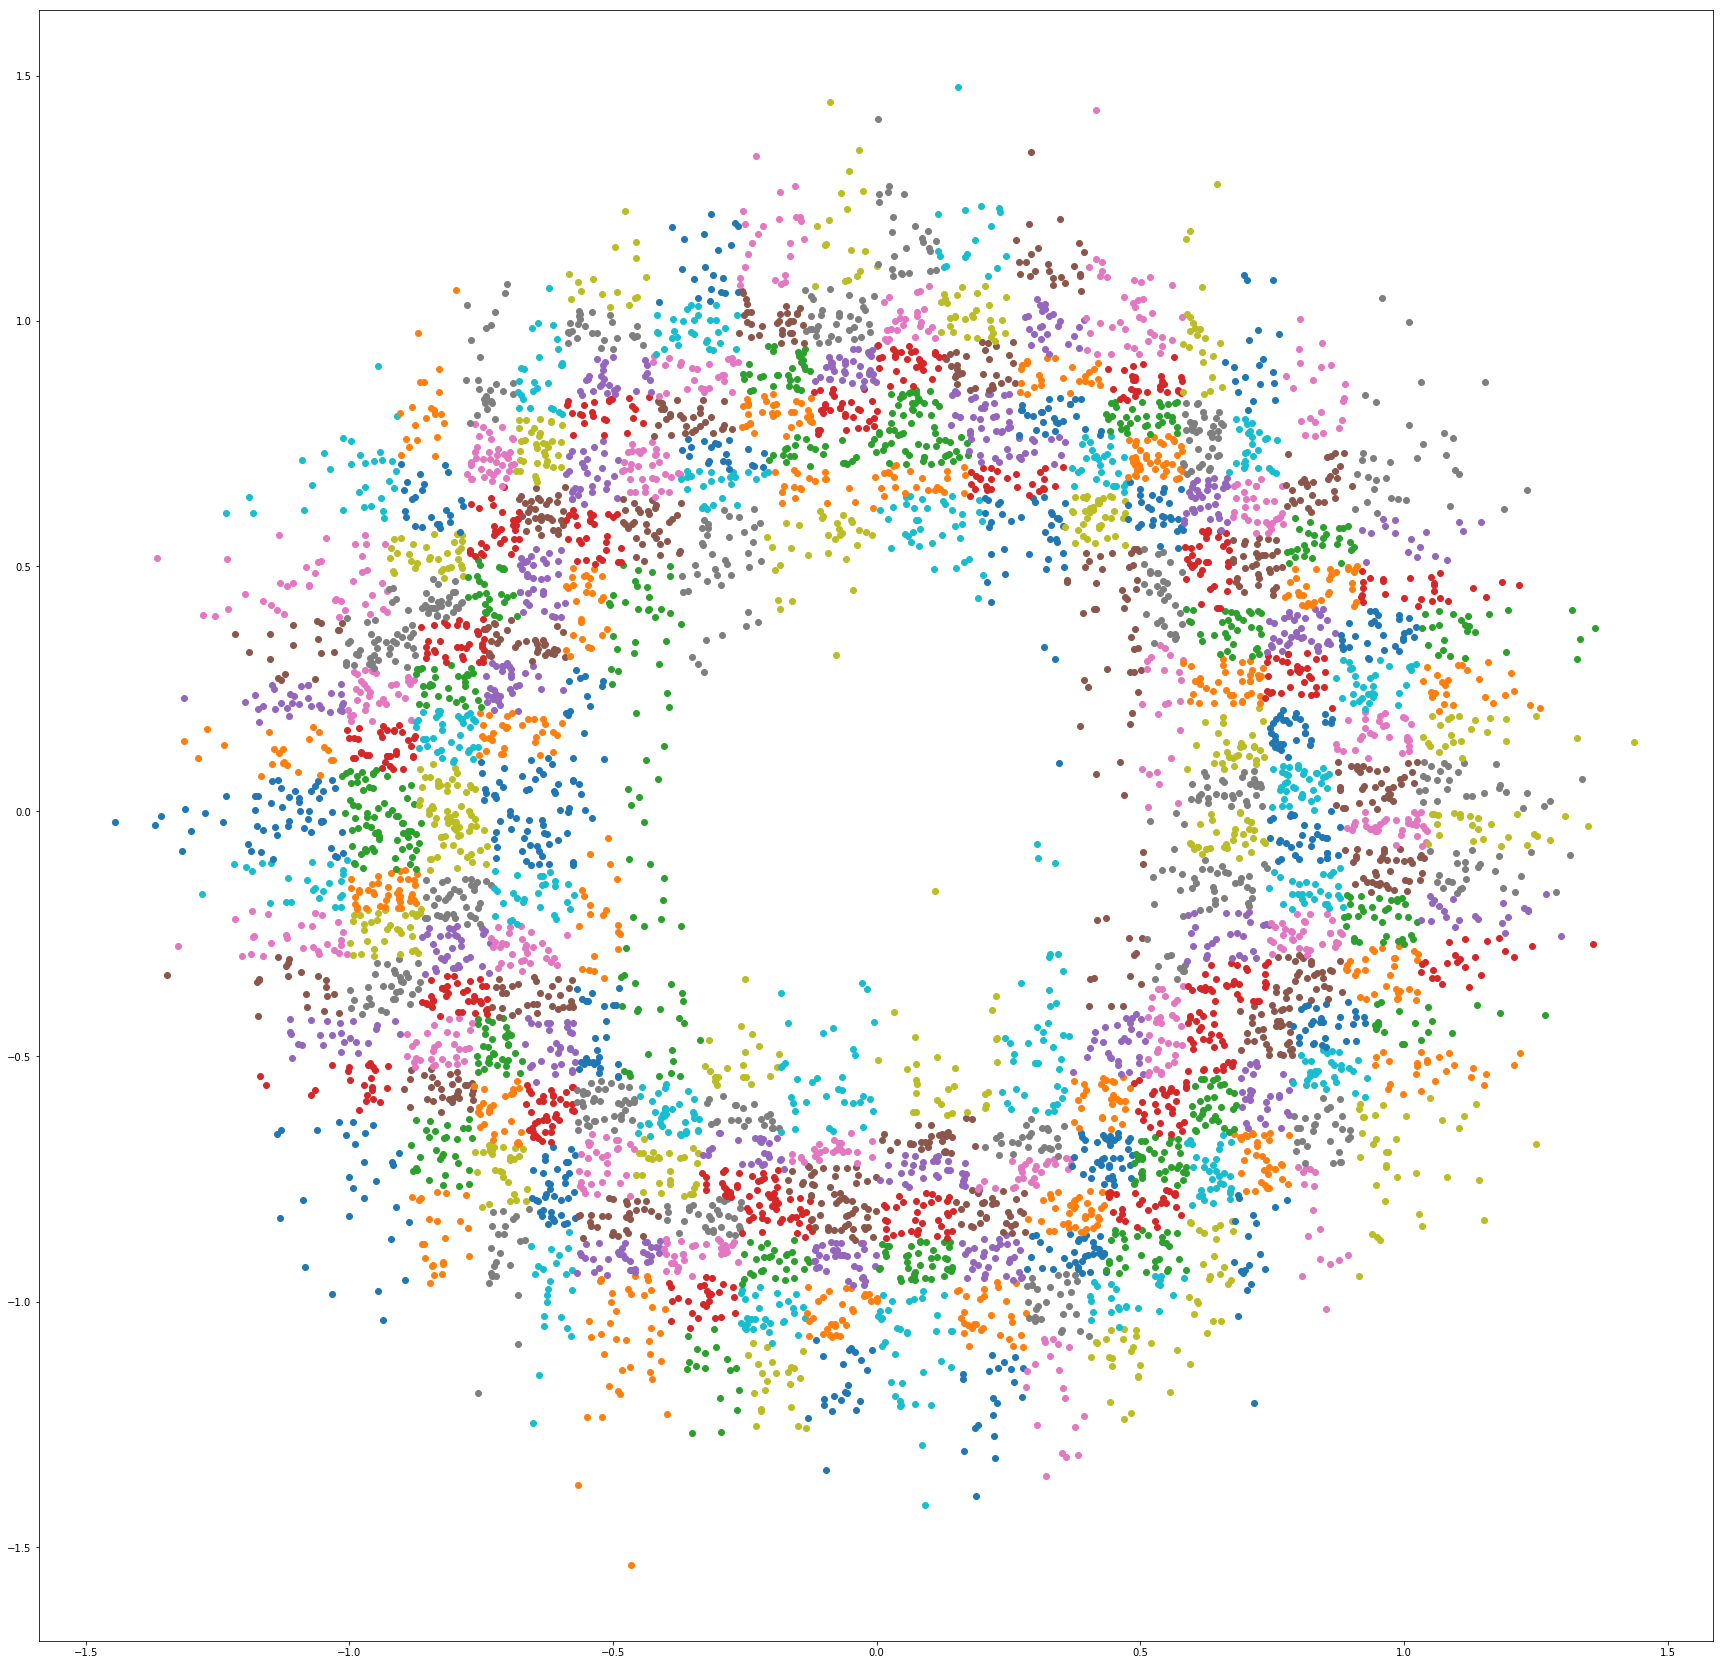

In [75]:
plt.figure(figsize=(30, 30))

root = node(0)
root.points = x_train

tree = k_tree()
tree.try_insert(root)
tree.show()
#график примерного разбиения на <=k соседей
#каждая группа точек одного цвета - соседи (в зависимости от расположения на графике)

In [76]:
marks = np.array([ tree.mark(x_test[i], root) for i in xrange(0, 3000) ])
answ = np.array([marks[i] == y_test[i] for i in xrange(0, 3000) ])

print 'My result = ' +  str(round(sum(answ)/3000.0, 3))

print 'SKLEARN KNN result = ' + str(round(knn_clf.score(x_test, y_test), 3))

print 'SKLEARN LinClass result = ' + str(round(accuracy_score(y_test, lin_clf.predict(x_test)), 3))

My result = 0.751
SKLEARN KNN result = 0.748
SKLEARN LinClass result = 0.531


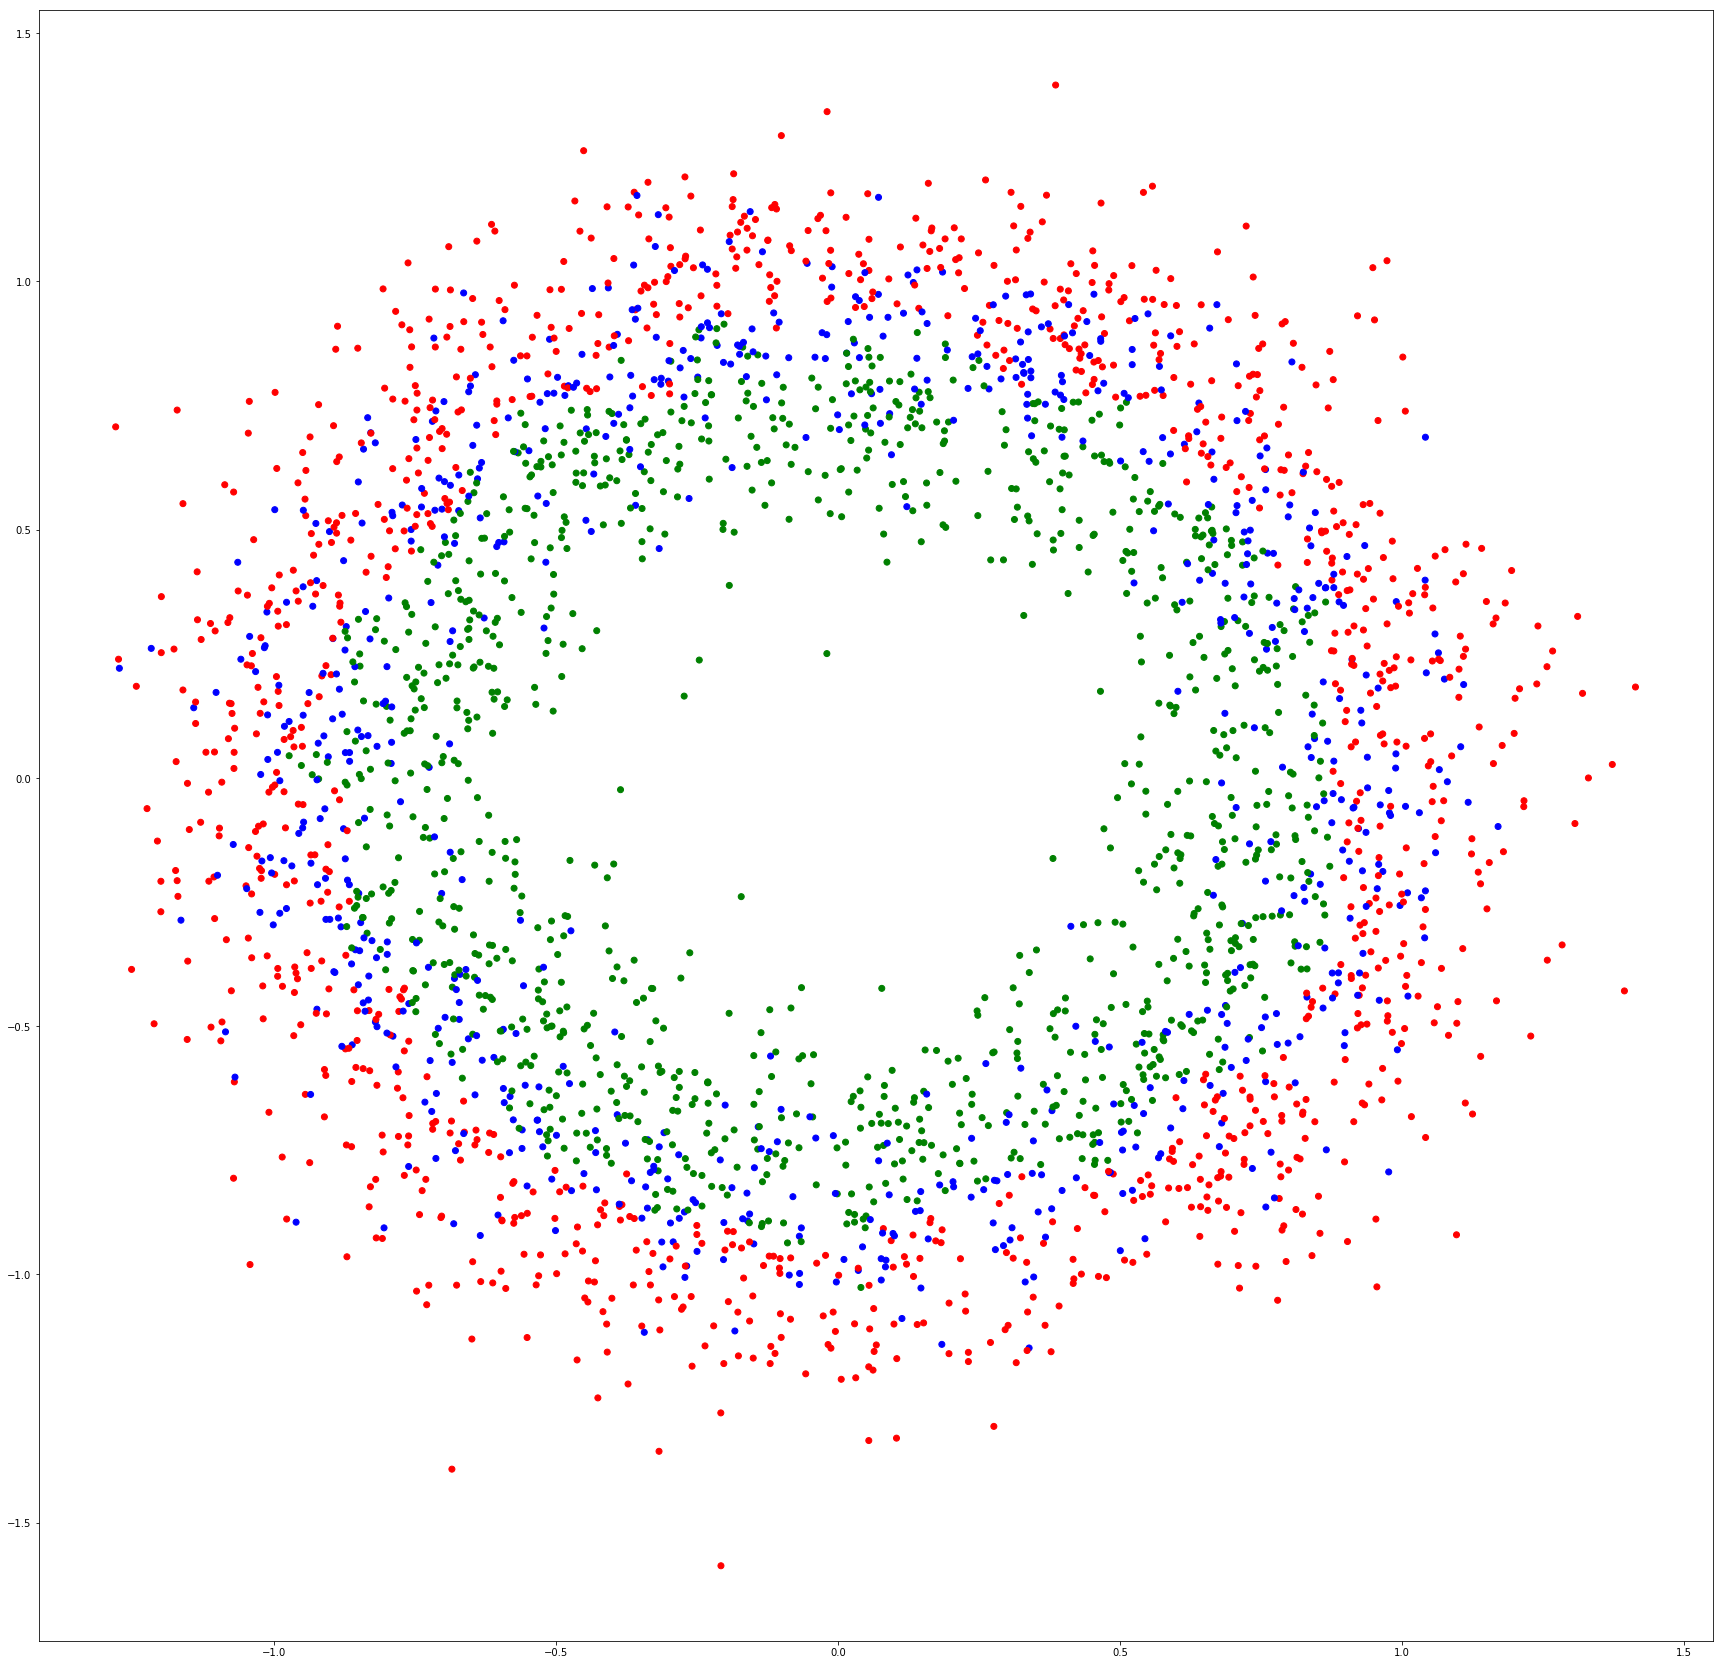

In [77]:
plt.figure(figsize=(30, 30))
res = y_test + marks
final_colors = ListedColormap(['red', 'blue', 'green'])
plt.scatter(x_test[:, 0], x_test[:, 1], c=res, cmap=final_colors)
plt.show()
#неверно классифицированные выделены синим !